<a href="https://colab.research.google.com/github/dariRusAG/MachineLearning/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%919119_09_03_04%D0%BF%D1%80%D0%BE%D0%B3%D0%B8%D0%BD(1)_%D0%90%D0%B3%D0%B0%D0%BF%D0%BE%D0%B2%D0%B0_%D0%94%D0%B0%D1%80%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 3. Линейные методы классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для метода опорных векторов (SVM) настроить параметры: *гиперпараметр регуляризации C*, *ядро*.
5. Доп. балл: найти реализацию метода стохастического градиента (SG), исследовать им свою выборку.
6. Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Метод опорных векторов](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9C.D0.B5.D1.82.D0.BE.D0.B4_.D0.BE.D0.BF.D0.BE.D1.80.D0.BD.D1.8B.D1.85_.D0.B2.D0.B5.D0.BA.D1.82.D0.BE.D1.80.D0.BE.D0.B2).

## Выполнил студент

Агапова Дарья Руслановна

Б9119-09.03.04прогин(1)

## Выборка данных: Image Segmentation Data Set

* Ссылка на выборку: https://archive.ics.uci.edu/ml/datasets/Image+Segmentation
* Описание выборки: экземпляры выбраны случайным образом из базы данных 7 наружных изображений. Изображения были сегментированы вручную, чтобы создать классификацию для каждого пикселя. Каждый экземпляр представляет собой регион размером 3x3. Задача состоит в определении класса экземпляра.
* Количество классов: 7
* Количество признаков: 19
* Типы признаков: real
* Количество объектов: 2310

## Библиотеки

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Метод опорных векторов (SVM)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/MMO/segmentation.csv', names=["CLASSES", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT", "SHORT-LINE-DENSITY-5", "SHORT-LINE-DENSITY-2", "VEDGE-MEAN", "VEDGE-SD", "HEDGE-MEAN", "HEDGE-SD", "INTENSITY-MEAN", "RAWRED-MEAN", "RAWBLUE-MEAN", "RAWGREEN-MEAN", "EXRED-MEAN", "EXBLUE-MEAN", "EXGREEN-MEAN", "VALUE-MEAN", "SATURATION-MEAN", "HUE-MEAN"], sep=";")

X = data[data.columns[1:]]
Y = data[data.columns[0]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=7)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Применение алгоритма классификации с найденными значениями параметров
model = SVC(kernel="rbf", C=176)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.9764996907854051
Test :  0.963924963924964
              precision    recall  f1-score   support

   BRICKFACE       1.00      0.99      0.99        90
      CEMENT       0.93      0.94      0.94       109
     FOLIAGE       0.94      0.89      0.92        94
       GRASS       1.00      0.99      1.00       104
        PATH       1.00      1.00      1.00        97
         SKY       1.00      1.00      1.00       105
      WINDOW       0.88      0.93      0.90        94

    accuracy                           0.96       693
   macro avg       0.96      0.96      0.96       693
weighted avg       0.96      0.96      0.96       693



## Поиск идеальной кросс-валидации

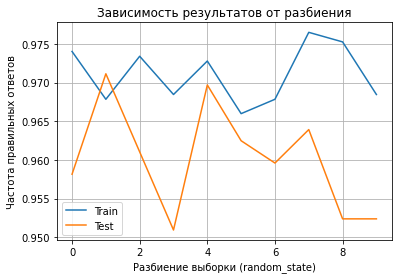

In [ ]:
scores_train = []
scores_test = []

n_random_state = list(range(10))
for random_state in n_random_state:
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=random_state)
  model = SVC(kernel="rbf", C=176)
  model.fit(X_train, Y_train)

  scores_test.append(model.score(X_test, Y_test))
  scores_train.append(model.score(X_train, Y_train))

pd_scores_train = np.array(scores_train)
pd_scores_test = np.array(scores_test)

plt.plot(n_random_state, pd_scores_train, label='Train')
plt.plot(n_random_state, pd_scores_test, label='Test')

plt.legend(loc='best')
plt.title('Зависимость результатов от разбиения')
plt.xlabel('Разбиение выборки (random_state)')
plt.ylabel('Частота правильных ответов')

plt.grid()
plt.show()

### Зависимость результата от константы C

*Гиперпараметр регуляризации C* (от 1 до 200).

In [ ]:
models = []
scores_train = []
scores_test = []
C_values = list(range(1, 200))
for local_C in C_values:
    model = SVC(kernel="rbf", C=local_C)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

max_elem = max(scores_test)
print(max_elem, scores_test.index(max_elem))
max_train = scores_train[scores_test.index(max_elem)]
print('test:', max_elem * 100, 'train:', max_train * 100)

0.9538239538239538 176
test: 95.38239538239537 train: 96.84601113172542


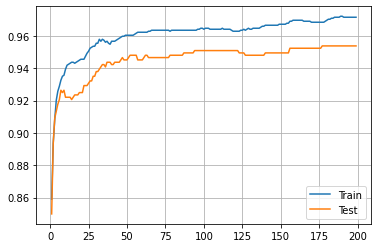

In [ ]:
plt.plot(C_values, scores_train, label='Train')
plt.plot(C_values, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

Лучшее значение константы C = 176

Качество на обучающей выборке: 96.85 %

Качество на контрольной выборке: 95.38 %

###Зависимость результата от ядра

*Ядро*: линейное (linear), ядро RBF (rbf), полиномиальное (poly), сигмоидальное (sigmoid).


In [ ]:
models = []
scores_train = []
scores_test = []
# kernels = ('linear', 'poly', 'rbf', 'sigmoid') 
# sigmoid и poly показали наихудшие результаты, для уточнения данных, рассмотрим без них
kernels = ('linear', 'rbf')
for local_kernel in kernels:
    model = SVC(kernel=local_kernel, C=176)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

In [ ]:
max_elem = max(scores_test)
max_train = scores_train[scores_test.index(max_elem)]
print('test:', max_elem * 100, 'train:', max_train * 100)

test: 95.23809523809523 train: 96.84601113172542


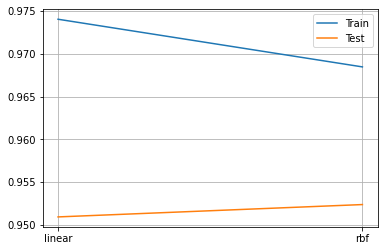

In [ ]:
plt.plot(kernels, scores_train, label='Train')
plt.plot(kernels, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

Лучшим ядром является rbf

Качество на обучающей выборке: 96.85 %

Качество на контрольной выборке: 95.24 %

## Метод стохастического градиента (SG)


**Задание на дополнительный балл**.

Самостоятельно найти реализацию и исследовать свою выборку данных.

Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Линейный классификатор и стохастический градиент](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9B.D0.B8.D0.BD.D0.B5.D0.B9.D0.BD.D1.8B.D0.B9_.D0.BA.D0.BB.D0.B0.D1.81.D1.81.D0.B8.D1.84.D0.B8.D0.BA.D0.B0.D1.82.D0.BE.D1.80_.D0.B8_.D1.81.D1.82.D0.BE.D1.85.D0.B0.D1.81.D1.82.D0.B8.D1.87.D0.B5.D1.81.D0.BA.D0.B8.D0.B9_.D0.B3.D1.80.D0.B0.D0.B4.D0.B8.D0.B5.D0.BD.D1.82)

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=80, random_state=34)
clf.fit(X_train, Y_train)

print('Train: ', clf.score(X_train, Y_train))
print('Test : ', clf.score(X_test, Y_test))
print(classification_report(Y_test, clf.predict(X_test)))

Train:  0.8750773036487323
Test :  0.86002886002886
              precision    recall  f1-score   support

   BRICKFACE       1.00      0.97      0.99       103
      CEMENT       0.62      0.91      0.74       103
     FOLIAGE       0.81      0.84      0.83       102
       GRASS       1.00      0.99      0.99        88
        PATH       0.91      0.87      0.89        97
         SKY       0.98      0.98      0.98        97
      WINDOW       0.85      0.49      0.62       103

    accuracy                           0.86       693
   macro avg       0.88      0.86      0.86       693
weighted avg       0.88      0.86      0.86       693



## Поиск идеального random_state для SG

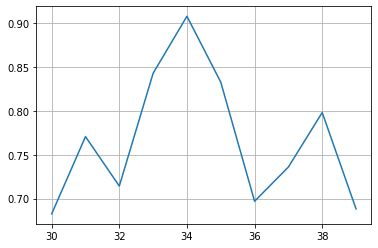

In [ ]:
from sklearn.linear_model import SGDClassifier
test_accuracy = []
random_state_range = range(30, 40)

for random_state in random_state_range:
    model_ = SGDClassifier(max_iter=100, random_state=random_state)
    model_.fit(X_train, Y_train) 
    test_accuracy.append(model_.score(X_test, Y_test))

plt.plot(random_state_range, test_accuracy)

plt.grid()
plt.show()

## Поиск идеального max_iter для SG

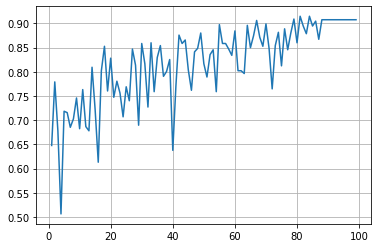

80


In [ ]:
test_accuracy = []
iter_range = range(1, 100)

for max_iter in iter_range:
  model_ = SGDClassifier(max_iter=max_iter, random_state=34)
  model_.fit(X_train, Y_train)
  test_accuracy.append(model_.score(X_test, Y_test))

plt.plot(iter_range, test_accuracy)

plt.grid()
plt.show()

print(test_accuracy.index(max(test_accuracy)))

---


# Заключение

## 1. Метод опорных векторов (SVM)

* Лучшее значение константы C = 176
* Лучшим ядром является rbf
* Качество на обучающей выборке: 97.65 %
* Качество на контрольной выборке: 96.39 %

## 2. Метод стохастического градиента (SG)

* random_state = 34
* max_iter = 80
* Качество на обучающей выборке: 87.51 %
* Качество на контрольной выборке: 86.00 %

## 3. Вывод

Лучший результат продемонстрировал метод опорных векторов (SVM), показав лучший результат на кантрольной выборке.
